# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from colorama import Fore, Back, Style 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
pd.DataFrame(cities).to_csv('Main_Cities.csv')

len(cities)


628

In [5]:




url = 'https://api.openweathermap.org/data/2.5/weather?q='

Cunter = 1
City_names = []
Lat = []
Lng = []
Humid = []
Wind = []
Temp = []
Clouds = []


#Testing API and Saving Jason file:
#city=cities[2]
#city_weather_info = (requests.get(url + city+'&appid='+weather_api_key)).json()
#with open('Weather_info.json', 'w') as json_file:
#    json.dump(city_weather_info, json_file)


    
    
print('------------------')
print('Start of Recording')
print('------------------')

for city in cities:
#for city in cities:
    try:
        city_weather_info = requests.get(url + city+'&appid='+weather_api_key).json()
        City_names.append(city_weather_info['name'])
        Lat.append(city_weather_info['coord']['lat'])
        Lng.append(city_weather_info['coord']['lon'])
        Humid.append(city_weather_info['main']['humidity'])
        Wind.append(city_weather_info['wind']['speed'])
        Temp.append(city_weather_info['main']['temp'])

        Clouds.append(city_weather_info['clouds']['all'])

        print(f'City Number {Cunter} complete ({Cunter}of{len(cities)}): {Fore.GREEN}  {city} {Style.RESET_ALL}')
    
    except KeyError:
        print(f'{Fore.RED}Missing data for City number {Cunter}:-->  {city}{Style.RESET_ALL}')
    
    Cunter = Cunter + 1
        
print('----------------')
print('End of Recording')
print('----------------')

------------------
Start of Recording
------------------
City Number 1 complete (1of628):   port alfred 
City Number 2 complete (2of628):   yatou 
City Number 3 complete (3of628):   guerrero negro 
City Number 4 complete (4of628):   ushuaia 
City Number 5 complete (5of628):   albany 
City Number 6 complete (6of628):   souillac 
City Number 7 complete (7of628):   mareeba 
City Number 8 complete (8of628):   torbay 
City Number 9 complete (9of628):   nichlaul 
City Number 10 complete (10of628):   barra do corda 
City Number 11 complete (11of628):   hithadhoo 
Missing data for City number 12:-->  belushya guba
City Number 13 complete (13of628):   mataura 
City Number 14 complete (14of628):   caravelas 
City Number 15 complete (15of628):   hofn 
City Number 16 complete (16of628):   new norfolk 
City Number 17 complete (17of628):   caramay 
City Number 18 complete (18of628):   sitka 
City Number 19 complete (19of628):   barrow 
City Number 20 complete (20of628):   kapaa 
City Number 21 compl

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
city_data = pd.DataFrame({'City': City_names,
                            'Latitude': Lat,
                            'Longitude': Lng,
                            'Humidity': Humid,
                            'Wind_Speed': Wind,
                            'Temperature': Temp,
                            'Cloudiness': Clouds,
                            })
city_data

,City,Latitude,Longitude,Humidity,Wind_Speed,Temperature,Cloudiness
0,Port Alfred,-33.59,26.89,39,3.12,286.64,0
1,Yatou,37.15,122.38,60,5.11,298.78,46
2,Guerrero Negro,27.98,-114.06,84,6.87,292.84,0
3,Ushuaia,-54.80,-68.30,74,2.10,271.15,0
4,Albany,42.60,-73.97,83,5.12,292.01,100
...,...,...,...,...,...,...,...
564,Pánuco,22.05,-98.17,72,5.70,288.15,90
565,Antoniny,49.81,26.88,89,0.96,285.98,84
566,Ust-Maya,60.42,134.53,35,2.30,301.65,94
567,Itagi,-14.16,-40.01,93,1.92,292.19,88


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:


#Save dataframe as csv
#300K × 9/5 - 459.67
city_data=city_data.rename(columns={'Temperature':'TemperatureK'})

#Converting Kelvin To Farenhite
city_data['Temperature']=(city_data.TemperatureK*9/5-459.67).astype(int)

pd.DataFrame.to_csv(city_data, 'output_data\city_data.csv')

city_data.head()

,City,Latitude,Longitude,Humidity,Wind_Speed,TemperatureK,Cloudiness,Temperature
0,Port Alfred,-33.59,26.89,39,3.12,286.64,0,56
1,Yatou,37.15,122.38,60,5.11,298.78,46,78
2,Guerrero Negro,27.98,-114.06,84,6.87,292.84,0,67
3,Ushuaia,-54.80,-68.30,74,2.10,271.15,0,28
4,Albany,42.60,-73.97,83,5.12,292.01,100,65


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
Cities_over100=city_data.loc[city_data['Humidity']>100]
print(Cities_over100)

Empty DataFrame
Columns: [City, Latitude, Longitude, Humidity, Wind_Speed, TemperatureK, Cloudiness, Temperature]
Index: []


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_weather_info DataFrame, which we call "clean_city_weather_info".


In [56]:
#Reading From CSV file
city_data=pd.read_csv('output_data\city_data.csv')
city_data

,Unnamed: 0,City,Latitude,Longitude,Humidity,Wind_Speed,TemperatureK,Cloudiness,Temperature
0,0,Port Alfred,-33.59,26.89,39,3.12,286.64,0,56
1,1,Yatou,37.15,122.38,60,5.11,298.78,46,78
2,2,Guerrero Negro,27.98,-114.06,84,6.87,292.84,0,67
3,3,Ushuaia,-54.80,-68.30,74,2.10,271.15,0,28
4,4,Albany,42.60,-73.97,83,5.12,292.01,100,65
...,...,...,...,...,...,...,...,...,...
564,564,Pánuco,22.05,-98.17,72,5.70,288.15,90,58
565,565,Antoniny,49.81,26.88,89,0.96,285.98,84,55
566,566,Ust-Maya,60.42,134.53,35,2.30,301.65,94,83
567,567,Itagi,-14.16,-40.01,93,1.92,292.19,88,66


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

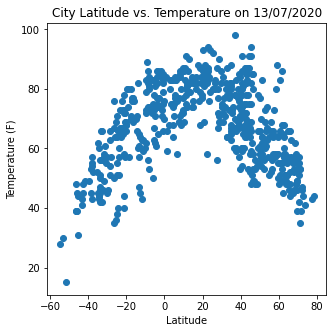

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(city_data.Latitude,city_data.Temperature)
plt.title(f'City Latitude vs. Temperature on 13/07/2020')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('output_data\lat_vs_temp.png')
plt.show()

This Scatter plot shows the relation between Latitude and Temperature on the data was retrieved from 'OpenWeather' website. It shows as we are going to the Equator the Temperatuer is going high too. The highest Temperature are around Latitude '0'.  

## Latitude vs. Humidity Plot

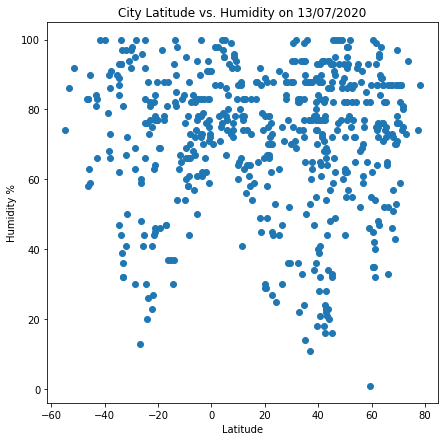

In [34]:
plt.figure(figsize=(7,7))
plt.scatter(city_data.Latitude,city_data.Humidity)
plt.title(f'City Latitude vs. Humidity on 13/07/2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig('output_data\lat_vs_hum.png')
plt.show()

This Scatter plot shows the potential relation between Latitude and Temperature on the data. It shows most of the cities have the Humidity more than 60 and the cities around Equator have a high Humidity. There is no obvious correlation between Humidity and Latitude.

## Latitude vs. Cloudiness Plot

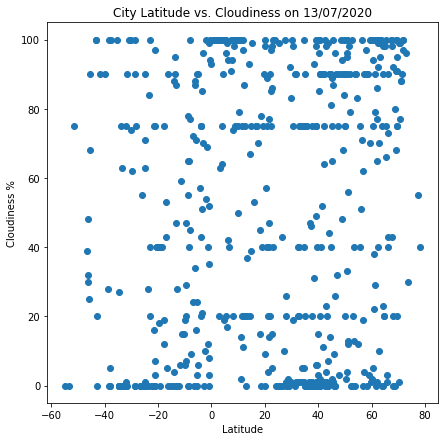

In [35]:
plt.figure(figsize=(7,7))
plt.scatter(city_data.Latitude,city_data.Cloudiness)
plt.title(f'City Latitude vs. Cloudiness on 13/07/2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.savefig('output_data\lat_vs_cloud.png')
plt.show()

This Scatter plot shows the potential relation between Latitude and Cloudiness on the data.It seems there is not a relation between Cloudiness and Latitude. 

## Latitude vs. Wind Speed Plot

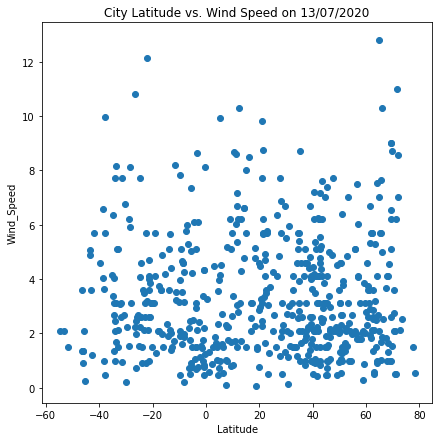

In [36]:
plt.figure(figsize=(7,7))
plt.scatter(city_data.Latitude,city_data.Wind_Speed)

plt.title(f'City Latitude vs. Wind Speed on 13/07/2020')
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
plt.savefig('output_data\lat_vs_wind.png')

plt.show()


This Scatter plot shows the potential relation between Latitude and Wind speed on the data.It shows most of the cities have a wind speed less than 4Mph but Thers is not a clear relation between Wind Speed and Latitude.

## Linear Regression

In [57]:
# OPTIONAL: Create a function to create Linear Regression plots

def LR (X,Y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y)
    regress_values = X * slope + intercept
    line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
    return line_eq , regress_values
    


In [58]:
# Create Northern and Southern Hemisphere DataFrames
Northen_data=city_data.loc[city_data.Latitude>=0]
#Northen_data
Southern_data=city_data.loc[city_data.Latitude<0]
#Southern_data

####  Northern Hemisphere - Temp vs. Latitude Linear Regression

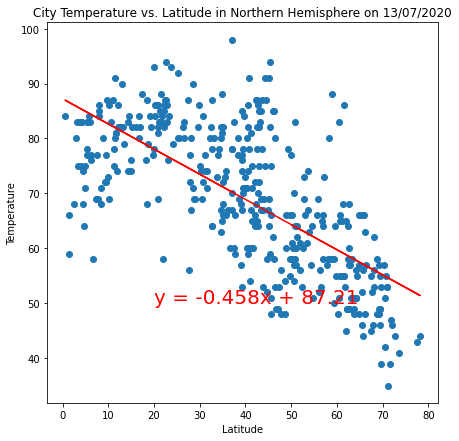

y = -0.458x + 87.21


In [50]:
plt.figure(figsize=(7,7))


y_values=Northen_data.Temperature
x_values=Northen_data.Latitude
(line_eq , regress_values)= LR (x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('City Temperature vs. Latitude in Northern Hemisphere on 13/07/2020')
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,50),fontsize=20,color="red")
plt.savefig('output_data\latvstemp_n.png')

plt.show()

print (line_eq)b

As we mentioned in general before, there is a strong negetive correlation between Temp and Latitude in Northern Hemisphere. The maximum tempertures were recorded close to the Equator (Lat=0)

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

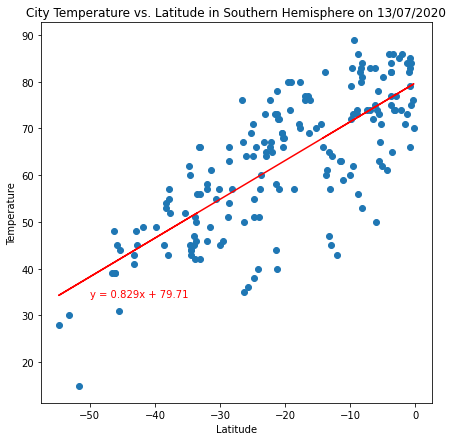

y = 0.829x + 79.71


In [51]:
plt.figure(figsize=(7,7))


y_values=Southern_data.Temperature
x_values=Southern_data.Latitude
(line_eq , regress_values)= LR (x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('City Temperature vs. Latitude in Southern Hemisphere on 13/07/2020')
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,34),fontsize=10,color="red")
plt.savefig('output_data\latvstemp_s.png')

plt.show()
print (line_eq)

This scatter plot showes again there is a strong positive correlation between Temp and Latitude in Southern Hemisphere. Same as Northen Hemisphere the maximum tempertures were recorded close to the Equator (Lat=0)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

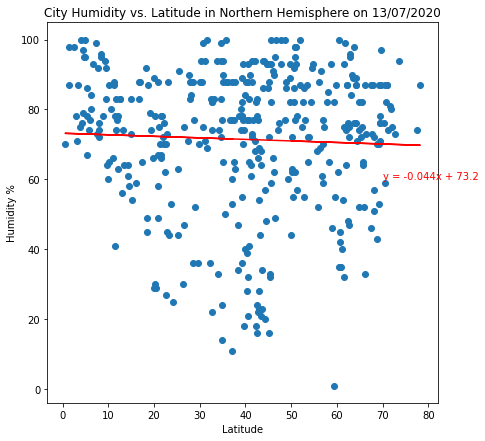

y = -0.044x + 73.2


In [52]:
plt.figure(figsize=(7,7))


y_values=Northen_data.Humidity
x_values=Northen_data.Latitude
(line_eq , regress_values)= LR (x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('City Humidity vs. Latitude in Northern Hemisphere on 13/07/2020')
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq,(70,60),fontsize=10,color="red")
plt.savefig('output_data\latvshum_n.png')

plt.show()
print (line_eq)

This plot shows the relationship between  Humidity and Latitude in Northen Hemisphere. there is a tiny slight trend on Humidity by going thowards the Equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

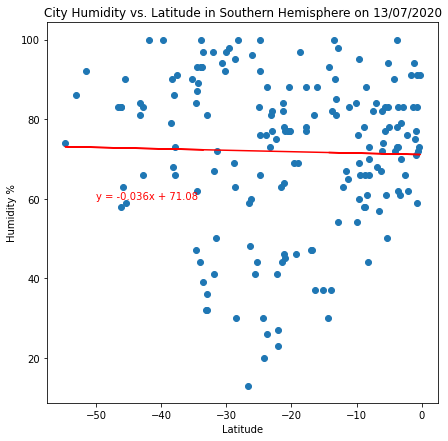

y = -0.036x + 71.08


In [53]:
plt.figure(figsize=(7,7))


y_values=Southern_data.Humidity
x_values=Southern_data.Latitude
(line_eq , regress_values)= LR (x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('City Humidity vs. Latitude in Southern Hemisphere on 13/07/2020')
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq,(-50,60),fontsize=10,color="red")
plt.savefig('output_data\latvshum_s.png')

plt.show()
print (line_eq)

This plot shows the relationship between  Humidity and Latitude in Southern Hemisphere. there is a tiny slight trend on Humidity by going thowards the Equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

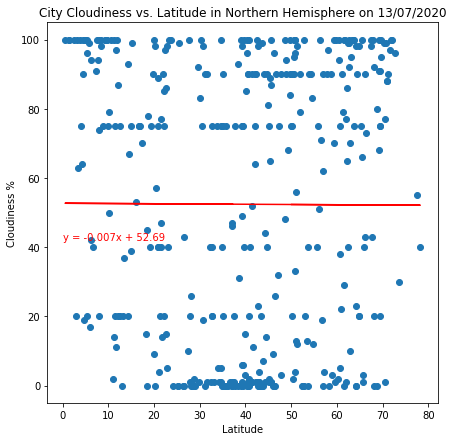

y = -0.007x + 52.69


In [54]:
plt.figure(figsize=(7,7))


y_values=Northen_data.Cloudiness
x_values=Northen_data.Latitude
(line_eq , regress_values)= LR (x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('City Cloudiness vs. Latitude in Northern Hemisphere on 13/07/2020')
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(-0,42),fontsize=10,color="red")
plt.savefig('output_data\latvsCloud_n.png')

plt.show()
print (line_eq)

This plot shows the relationship between Cloudiness and Latitude in Northen Hemisphere. The reression shows the cloudiness has a little dependency with Latitude which we can ignore (just=0.007)  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

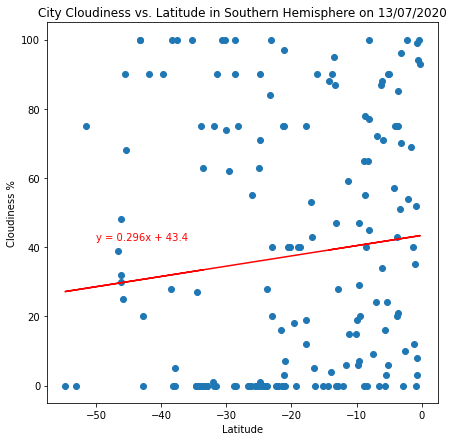

y = 0.296x + 43.4


In [55]:
plt.figure(figsize=(7,7))


y_values=Southern_data.Cloudiness
x_values=Southern_data.Latitude
(line_eq , regress_values)= LR (x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('City Cloudiness vs. Latitude in Southern Hemisphere on 13/07/2020')
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(-50,42),fontsize=10,color="red")
plt.savefig('output_data\latvsCloud_s.png')

plt.show()
print (line_eq)

This plot shows the relationship between Cloudiness and Latitude in southern Hemisphere.Unlike the Northen Hemisphere, The reression shows the cloudiness has a more dependency with Latitud about 0.29 in Sothern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

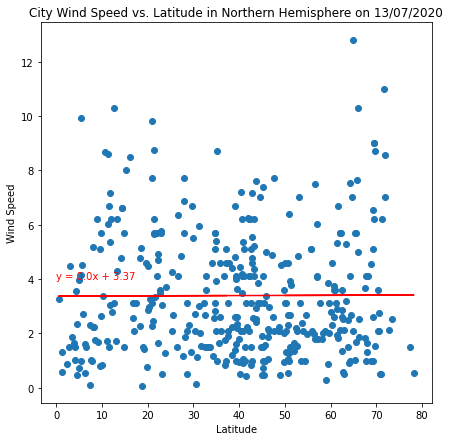

y = 0.0x + 3.37


In [60]:
plt.figure(figsize=(7,7))


y_values=Northen_data.Wind_Speed
x_values=Northen_data.Latitude
(line_eq , regress_values)= LR (x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('City Wind Speed vs. Latitude in Northern Hemisphere on 13/07/2020')
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(0,4),fontsize=10,color="red")
plt.savefig('output_data\latvsWind_n.png')


plt.show()
print (line_eq)

This plot shows the relationship between Wind speed and Latitude in Northen Hemisphere. The reression shows , Although most of the cities have wind speed less than 4 , the cloudiness has not any correlation with Latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

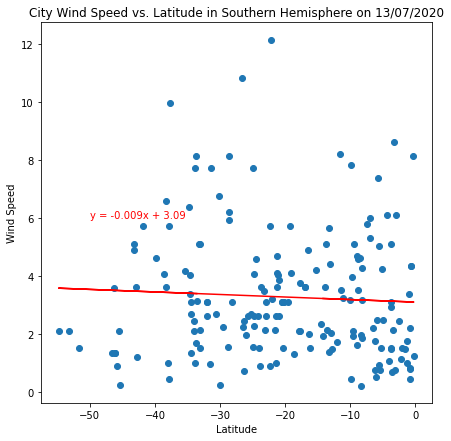

y = -0.009x + 3.09


In [61]:
plt.figure(figsize=(7,7))


y_values=Southern_data.Wind_Speed
x_values=Southern_data.Latitude
(line_eq , regress_values)= LR (x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('City Wind Speed vs. Latitude in Southern Hemisphere on 13/07/2020')
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,6),fontsize=10,color="red")
plt.savefig('output_data\latvsWind_s.png')


plt.show()
print (line_eq)

This plot shows the relationship between Wind Speed and Latitude in southern Hemisphere.Unlike the Northen Hemisphere, The reression shows the Wind Speed has a a little correlation with Latitud in Sothern Hemisphere.